Imports und Initialisierung des Datensatztes (Starten vor der Ausführung des restlichen Codes notwendig!)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

df = pd.read_csv('D:/AWIS/Semester_03/SFP/Webscraper_Autoscout/SFP_Workspace/car_data_csv.csv',sep=';')

cmap = plt.get_cmap('Set3')

df.describe(include='all')


,Verbrauch,Hersteller,Emissionen,Fahrzeughalter,Schadstoffklasse,Preis,Sitzplätze,Türen,Kilometerstand,Alter,HU,Leistung,Getriebe,Kraftstoff,Außenfarbe
count,504.000000,504,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504,504,504
unique,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,15
top,NaN,Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Schaltgetriebe,Benzin,Schwarz
freq,NaN,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,355,365,134
mean,6.413889,NaN,154.984127,1.912698,4.988095,10499.734127,4.861111,4.666667,117919.289683,11.202381,18.861111,98.456349,NaN,NaN,NaN
std,1.923984,NaN,47.863164,0.913951,0.928806,3994.871660,0.805397,0.746097,71024.089473,5.867211,7.804301,36.156580,NaN,NaN,NaN
min,3.000000,NaN,0.000000,1.000000,3.000000,1100.000000,2.000000,3.000000,10.000000,0.000000,0.000000,37.000000,NaN,NaN,NaN
25%,5.100000,NaN,120.000000,1.000000,4.000000,7497.500000,5.000000,5.000000,68000.000000,6.000000,15.000000,74.000000,NaN,NaN,NaN
50%,5.900000,NaN,140.000000,2.000000,5.000000,11890.000000,5.000000,5.000000,107250.000000,10.500000,24.000000,92.000000,NaN,NaN,NaN
75%,7.400000,NaN,178.250000,2.000000,6.000000,13980.000000,5.000000,5.000000,151821.000000,16.000000,24.000000,115.000000,NaN,NaN,NaN


Klassifizierung der Merkmale - ausführen falls nötig

In [ ]:
bins = [0, 80, 120, 200, 250, 320] 
labels=["sehr gering","gering","moderat","hoch","sehr hoch"]
df['Emissionen'] = pd.cut(df['Emissionen'], bins)

In [ ]:
bins = [0, 2, 4, 6, 8, 10, 12, 14]
labels  = ["A","B","C","D","E","F","G"]
df['Verbrauch'] = pd.cut(df['Verbrauch'], bins = bins)

In [ ]:
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000]
labels = ['A', 'B', 'C', 'D', 'E' , 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']
df['Preis'] = pd.cut(df['Preis'], bins = bins)

In [ ]:
bins = [0, 2500, 5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 125000, 150000, 175000, 200000, 250000, 300000, 600000]
labels = ['A', 'B', 'C', 'D', 'E' , 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O','P','Q','R','S']
df['Kilometerstand'] = pd.cut(df['Kilometerstand'], bins = bins)

In [ ]:
bins = [0, 50, 100, 150, 200, 250, 300, 350]
labels = ['A', 'B', 'C', 'D', 'E' , 'F', 'G']
df['Leistung'] = pd.cut(df['Leistung'], bins = bins)

In [30]:
bins = [0, 5, 10, 15, 20, 25]
labels = ['1', '2', '3', '4', '5']
df['Alter'] = pd.cut(df['Alter'], bins = bins)

In [ ]:
bins = [-20, 3, 6, 9, 12, 15, 18, 21, 31]
labels = ['1Q', '2Q', '3Q', '4Q', '5Q', '6Q', '7Q', '8Q']
df["HU"] = pd.cut(df['HU'], bins = bins, labels = labels)

In [ ]:
bins = [0, 5, 11, 17, 23]
df["Alter"] = pd.cut(df['Alter'], bins = bins)

Deskriptive Analyse - Grundwerte

In [ ]:
df.isnull().sum()

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
df.describe(include='all')

Relative Häufigkeit der Altersklassen genutzt bei der Erhebung (Klassifizierung vornehmen!)

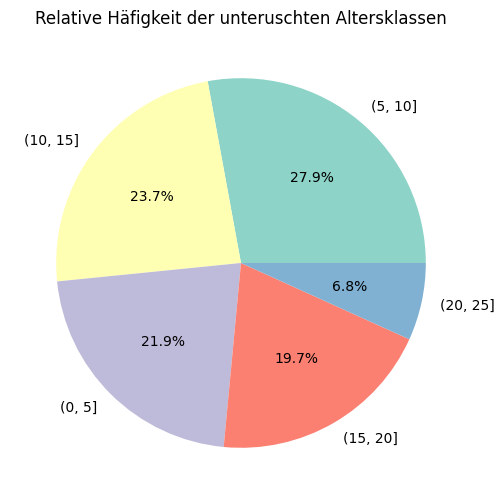

In [31]:
values = df['Alter'].value_counts()
labels = values.index

plt.figure(figsize=(10,6))
# Create a colormap for the pie chart
colors = cmap(np.arange(len(values)) % cmap.N)
plt.pie(values, labels = labels, autopct='%1.1f%%', colors=colors)
plt.title('Relative Häfigkeit der unteruschten Altersklassen')
plt.show()

Relative Häufigkeit der untersuchten Kraftstoffarten

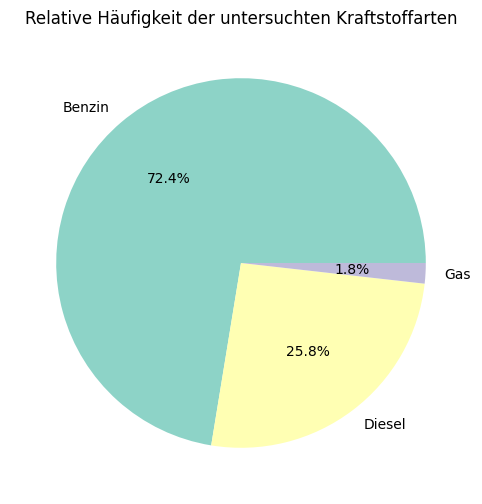

In [32]:
values = df['Kraftstoff'].value_counts()
labels = values.index

plt.figure(figsize=(10,6))
# Create a colormap for the pie chart
colors = cmap(np.arange(len(values)) % cmap.N)
plt.pie(values, labels = labels, autopct='%1.1f%%', colors=colors)
plt.title('Relative Häufigkeit der untersuchten Kraftstoffarten')
plt.show()

Kreisdiagramm für die relative Häufigkeit der Farben in Prozent (Andere <2.5%)

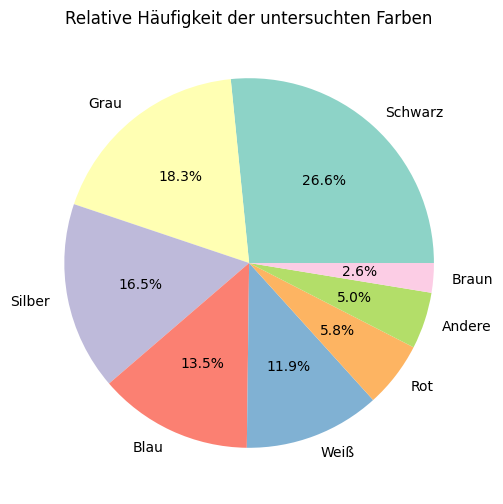

In [4]:
# Calculate value counts
counts = df['Farbe'].value_counts()

# Calculate percentages
percentages = counts / counts.sum() * 100

# Identify labels with less than 2.5%
other_labels = percentages[percentages < 2.5].index

# Replace these labels in the original DataFrame
df['Farbe'] = df['Farbe'].replace(other_labels, 'Andere')

# Recalculate the value counts
new_counts = df['Farbe'].value_counts()

# Create Color Map for the Pie Chart
colors = cmap(np.arange(len(new_counts)) % cmap.N)

# Plot the pie chart
plt.figure(figsize=(10,6))
plt.pie(new_counts, labels = new_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Relative Häufigkeit der untersuchten Farben')
plt.show()


Balkendiagramm für die Absolute Häufigkeit der Farben (Andere <2.5%)

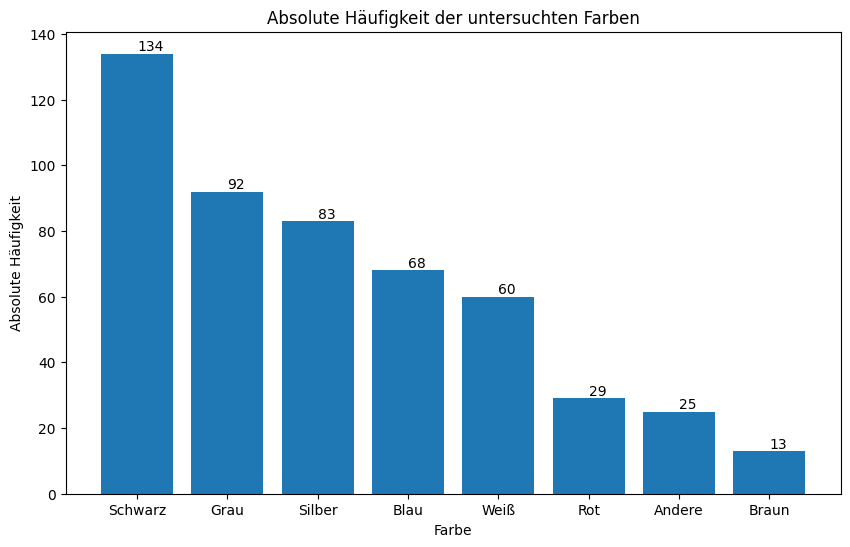

In [5]:
# Calculate relative frequencies
relative_freq = df['Farbe'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(relative_freq.index, relative_freq.values)

plt.title('Absolute Häufigkeit der untersuchten Farben')
plt.xlabel('Farbe')
plt.ylabel('Absolute Häufigkeit')

# Add the exact values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.show()

Artithmetisches Mittel des Preises für jede untersuchte Farbe

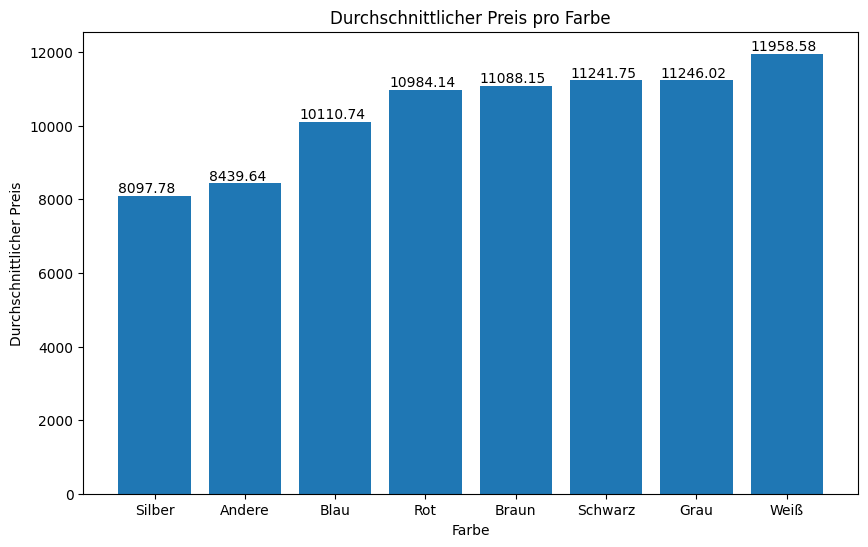

In [6]:
# Calculate the mean of "Preis" for each unique "Farbe"
mean_prices = df.groupby('Farbe')['Preis'].mean()

# Sort the Series in ascending order
mean_prices = mean_prices.sort_values()

# Plot the bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(mean_prices.index, mean_prices.values)

plt.title('Durchschnittlicher Preis pro Farbe')
plt.xlabel('Farbe')
plt.ylabel('Durchschnittlicher Preis')

# Add the exact values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval, round(yval, 2), va='bottom')  # va: vertical alignment

plt.show()

Preisverteilung nach Kraftstoffart

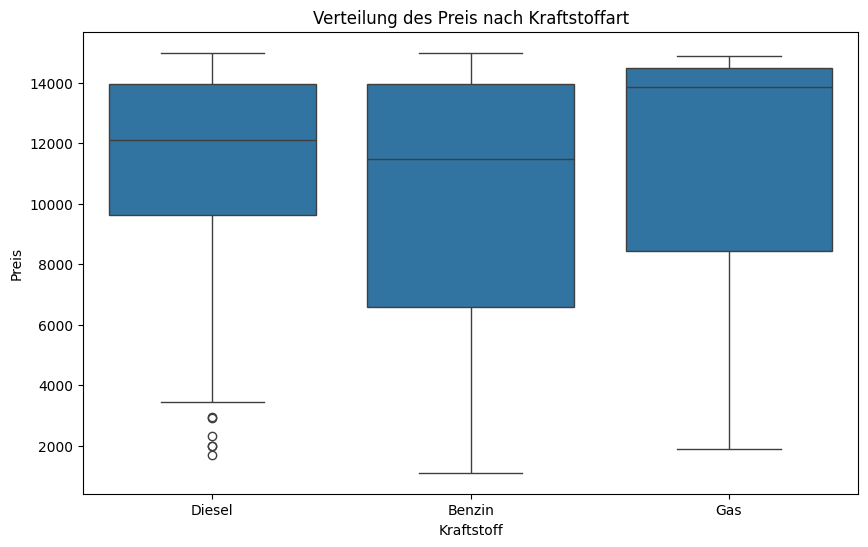

Kraftstoff
Benzin    10213.304110
Diesel    11239.923077
Gas       11424.444444
Name: Preis, dtype: float64


In [7]:
# Boxplot erstellen
plt.figure(figsize=(10,6))
sns.boxplot(x='Kraftstoff', y='Preis', data=df)
plt.title('Verteilung des Preis nach Kraftstoffart')
plt.show()

# Durchschnittlichen Preis für jede Kraftstoffart berechnen
average_prices = df.groupby('Kraftstoff')['Preis'].mean().sort_values()
print(average_prices)

Absulute Höufigkeit der Preisklassen in Form einer Tabelle (Grafik schlecht lesbar)

In [8]:
# Create a DataFrame from the counts
counts_df = pd.DataFrame(counts).reset_index()

# Rename the columns
counts_df.columns = ['Preis', 'Häufigkeit']

counts_df.to_clipboard(index=False)

# Display the DataFrame
print(counts_df)

      Preis  Häufigkeit
0   Schwarz         134
1      Grau          92
2    Silber          83
3      Blau          68
4      Weiß          60
5       Rot          29
6     Braun          13
7      Grün           9
8     Beige           4
9    Orange           3
10  Violett           2
11   Bronze           2
12     Gold           2
13     Gelb           2
14  Silbesr           1


Beschreibung Hersteller/Preis in Form einer Tabelle

In [38]:
# Calculate the mean, max, and min of "Preis" for each unique "Hersteller"
stats_df = df.groupby('Hersteller')['Preis'].agg(['mean', 'max', 'min'])

# Round the mean to 2 decimal places
stats_df['mean'] = stats_df['mean'].round(2)

# Calculate the frequencies of each "Hersteller"
freqs = df['Hersteller'].value_counts()

# Join the frequencies to the stats_df DataFrame
stats_df = stats_df.join(freqs.rename('frequency'))

# Sort the DataFrame by the frequencies in descending order
stats_df = stats_df.sort_values('frequency', ascending=False)

stats_df.to_clipboard()

# Display the DataFrame
print(stats_df)

                   mean    max    min  frequency
Hersteller                                      
Volkswagen     11463.04  14990   1990         77
BMW            10144.35  14950   2499         49
Mercedes-Benz   8852.70  14950   2790         46
Opel           10405.43  14999   1390         42
Kia            12810.69  14990   4699         39
Audi           10528.69  14990   1900         35
Ford           11554.08  14990   2499         25
Skoda           9540.72  14950   1790         18
Renault         9375.28  14999   1100         18
Hyundai        11405.83  14895   2400         18
Volvo          11026.35  14990   1989         17
SEAT           11734.53  14960   3590         17
Toyota          9171.85  14909   1795         13
Mazda          10871.38  14999   2400         13
Nissan          9381.67  14980   1300         12
Citroen         8181.42  14990   1200         12
Mitsubishi     10638.75  14990   3550          8
Peugeot        10719.43  14999   3499          7
Fiat            9139

Relative Häufigkeit der untersuchten Hersteller (Andere < 2.5%)

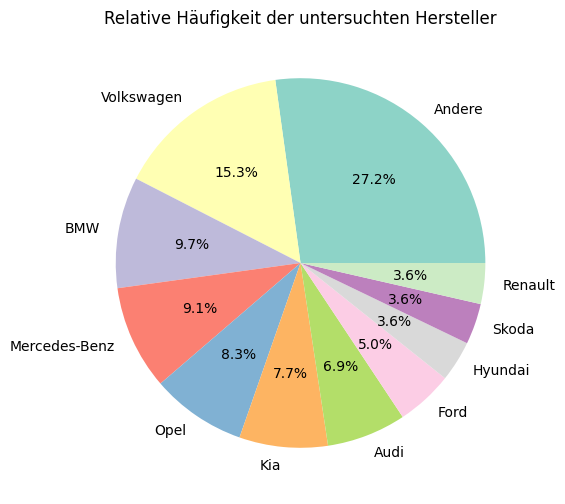

In [39]:
import matplotlib.pyplot as plt


# Calculate value counts
counts = df['Hersteller'].value_counts()

# Calculate percentages
percentages = counts / counts.sum() * 100

# Identify labels with less than 3.5%
other_labels = percentages[percentages < 3.5].index

# Replace these labels in the original DataFrame
df['Hersteller'] = df['Hersteller'].replace(other_labels, 'Andere')

# Recalculate the value counts
new_counts = df['Hersteller'].value_counts()

# Create a colormap for the pie chart
colors = cmap(np.arange(len(new_counts)) % cmap.N)

# Plot the pie chart
plt.figure(figsize=(10,6))
plt.pie(new_counts, labels = new_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Relative Häufigkeit der untersuchten Hersteller')
plt.show()

Datensatzbeschreibung für die Merkmale Preis, Hersteller, Alter, Kilometerstand, Getriebe

In [1]:
# Get a description of the specified columns
description = df[['Preis', 'Hersteller', 'Alter', 'Kilometerstand', 'Getriebe']].describe().round(2)
description.to_clipboard()

# Display the description
print(description)

NameError: name 'df' is not defined

Da "Kraftstoff" eine kategoriale Variable und "Preis" eine kontinuierliche Variable ist, können Sie den ANOVA (Analysis of Variance) Test verwenden, um den Zusammenhang zwischen diesen beiden Variablen zu überprüfen. Der ANOVA-Test prüft die Hypothese, dass die Mittelwerte von mehr als zwei Gruppen gleich sind.

Die F-Statistik gibt an, wie stark die Gruppen voneinander abweichen, und der P-Wert gibt die Wahrscheinlichkeit an, dass Sie solche Unterschiede zufällig beobachten würden, wenn die Gruppenmittelwerte tatsächlich gleich wären. Ein kleiner P-Wert (typischerweise ≤ 0,05) weist auf starke Beweise gegen die Nullhypothese hin, so dass Sie die Nullhypothese ablehnen.

In [41]:
from scipy.stats import f_oneway

# Gruppen basierend auf 'Kraftstoff' erstellen
groups = df.groupby('Kraftstoff')['Preis'].apply(list)

# ANOVA-Test durchführen
f_stat, p_value = f_oneway(*groups)

print('F-Statistik:', f_stat)
print('P-Wert:', p_value)

F-Statistik: 3.443932685962521
P-Wert: 0.03269695057531437


Erste Probe der multiplen linearen Regression (Klassifizierung zurücksetzen)

In [42]:
# Angenommen, 'Kilometerstand' und 'Alter' sind andere kontinuierliche unabhängige Variablen
X = df[['Kraftstoff', 'Kilometerstand', 'Erstzulassung']]
y = df['Preis']

# Daten in Trainings- und Testsets aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# One-Hot-Encoding für die kategoriale Variable 'Kraftstoff'
column_trans = make_column_transformer((OneHotEncoder(), ['Kraftstoff']), remainder='passthrough')

# Lineare Regression erstellen
linreg = LinearRegression()

# Pipeline erstellen
pipe = make_pipeline(column_trans, linreg)

# Modell trainieren
pipe.fit(X_train, y_train)

# Vorhersagen auf dem Testset machen
y_pred = pipe.predict(X_test)

# Create a DataFrame for the test data
test_data = X_test.copy()

# Calculate the accuracy of the model
accuracy = pipe.score(X_test, y_test)

# Print the accuracy
print("Accuracy: ", accuracy)

# Add the predictions to the DataFrame
test_data['Predicted Preis'] = y_pred

# Print the DataFrame
print(test_data)

TypeError: float() argument must be a string or a real number, not 'pandas._libs.interval.Interval'